# Centrality scores

In [1]:
import networkx as nx

# Step 1: Create a small undirected graph
graph = nx.Graph()
graph.add_edges_from([
    (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6)
])

print("Graph edges:", list(graph.edges))

# Step 2: Compute Degree Centrality
degree_centrality = nx.degree_centrality(graph)
print("\nDegree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.2f}")

# Step 3: Compute Closeness Centrality
closeness_centrality = nx.closeness_centrality(graph)
print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality:.2f}")

# Step 4: Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(graph)
print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality:.2f}")


Graph edges: [(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6)]

Degree Centrality:
Node 1: 0.40
Node 2: 0.40
Node 3: 0.60
Node 4: 0.60
Node 5: 0.20
Node 6: 0.20

Closeness Centrality:
Node 1: 0.50
Node 2: 0.50
Node 3: 0.71
Node 4: 0.71
Node 5: 0.45
Node 6: 0.45

Betweenness Centrality:
Node 1: 0.00
Node 2: 0.00
Node 3: 0.60
Node 4: 0.70
Node 5: 0.00
Node 6: 0.00


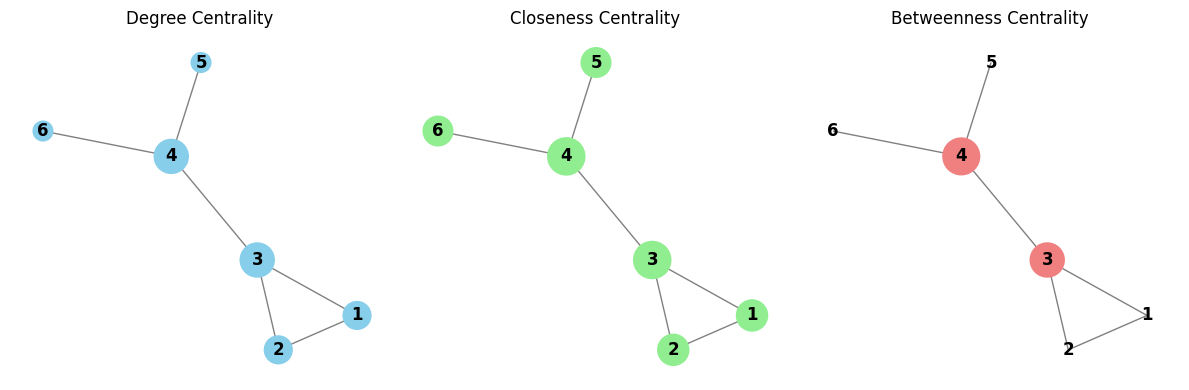

In [2]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(graph)  # Layout for consistent positioning

# Plot Degree Centrality
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
nx.draw(graph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=[v * 1000 for v in degree_centrality.values()], font_weight='bold')
plt.title("Degree Centrality")

# Plot Closeness Centrality
plt.subplot(1, 3, 2)
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=[v * 1000 for v in closeness_centrality.values()], font_weight='bold')
plt.title("Closeness Centrality")

# Plot Betweenness Centrality
plt.subplot(1, 3, 3)
nx.draw(graph, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=[v * 1000 for v in betweenness_centrality.values()], font_weight='bold')
plt.title("Betweenness Centrality")

plt.tight_layout()
plt.show()

In [3]:
# Step-by-step computation of Degree Centrality
def compute_degree_centrality(graph):
    n = len(graph) - 1  # Total number of other nodes
    degree_centrality = {}
    for node in graph.nodes:
        degree = len(graph[node])  # Number of neighbors
        degree_centrality[node] = degree / n
        print(f"Node {node}: Degree = {degree}, Centrality = {degree}/{n} = {degree_centrality[node]:.2f}")
    return degree_centrality


In [4]:

# Step-by-step computation of Closeness Centrality
def compute_closeness_centrality(graph):
    closeness_centrality = {}
    for node in graph.nodes:
        shortest_paths = nx.single_source_shortest_path_length(graph, node)
        total_distance = sum(shortest_paths.values())
        if total_distance > 0:
            centrality = (len(graph) - 1) / total_distance
        else:
            centrality = 0
        closeness_centrality[node] = centrality
        print(f"Node {node}: Total Distance = {total_distance}, Centrality = {len(graph) - 1}/{total_distance} = {centrality:.2f}")
    return closeness_centrality


In [5]:

# Step-by-step computation of Betweenness Centrality
def compute_betweenness_centrality(graph):
    betweenness_centrality = {node: 0 for node in graph.nodes}
    for source in graph.nodes:
        shortest_paths = nx.single_source_shortest_path(graph, source)
        path_count = {}
        for target in graph.nodes:
            if target == source:
                continue
            for path in shortest_paths.values():
                if target in path:
                    path_count[target] = path_count.get(target, 0) + 1

        for node, count in path_count.items():
            if node != source:
                betweenness_centrality[node] += count / len(shortest_paths)

    # Normalize the betweenness centrality
    normalization_factor = (len(graph) - 1) * (len(graph) - 2) / 2
    for node in betweenness_centrality:
        betweenness_centrality[node] /= normalization_factor
        print(f"Node {node}: Normalized Betweenness = {betweenness_centrality[node]:.2f}")
    return betweenness_centrality


In [6]:
# Compute and display centrality scores
print("\nDegree Centrality:")
degree_centrality = compute_degree_centrality(graph)

print("\nCloseness Centrality:")
closeness_centrality = compute_closeness_centrality(graph)

print("\nBetweenness Centrality:")
betweenness_centrality = compute_betweenness_centrality(graph)


Degree Centrality:
Node 1: Degree = 2, Centrality = 2/5 = 0.40
Node 2: Degree = 2, Centrality = 2/5 = 0.40
Node 3: Degree = 3, Centrality = 3/5 = 0.60
Node 4: Degree = 3, Centrality = 3/5 = 0.60
Node 5: Degree = 1, Centrality = 1/5 = 0.20
Node 6: Degree = 1, Centrality = 1/5 = 0.20

Closeness Centrality:
Node 1: Total Distance = 10, Centrality = 5/10 = 0.50
Node 2: Total Distance = 10, Centrality = 5/10 = 0.50
Node 3: Total Distance = 7, Centrality = 5/7 = 0.71
Node 4: Total Distance = 7, Centrality = 5/7 = 0.71
Node 5: Total Distance = 11, Centrality = 5/11 = 0.45
Node 6: Total Distance = 11, Centrality = 5/11 = 0.45

Betweenness Centrality:
Node 1: Normalized Betweenness = 0.08
Node 2: Normalized Betweenness = 0.08
Node 3: Normalized Betweenness = 0.28
Node 4: Normalized Betweenness = 0.32
Node 5: Normalized Betweenness = 0.08
Node 6: Normalized Betweenness = 0.08


# Pagerank

In [10]:
# Convert NetworkX graph to adjacency list
def nx_to_adjacency_list(graph_nx):
    adjacency_list = {node: list(graph_nx.neighbors(node)) for node in graph_nx.nodes}
    return adjacency_list

# Convert and print the adjacency list
adjacency_list = nx_to_adjacency_list(graph)
print("Adjacency List Representation:")
print(adjacency_list)

Adjacency List Representation:
{1: [2, 3], 2: [1, 3], 3: [1, 2, 4], 4: [3, 5, 6], 5: [4], 6: [4]}


In [7]:
# Step-by-step PageRank computation
def compute_pagerank(graph, damping=0.85, max_iterations=100, tol=1.0e-6):
    # Step 1: Initialize variables
    num_nodes = len(graph)
    pagerank = {node: 1 / num_nodes for node in graph}  # Equal initial rank
    print("Initial PageRank:", pagerank)

    # Step 2: Compute the PageRank iteratively
    for iteration in range(max_iterations):
        new_pagerank = {node: (1 - damping) / num_nodes for node in graph}  # Teleportation factor

        # Distribute PageRank from each node to its neighbors
        for node, neighbors in graph.items():
            rank_share = pagerank[node] / len(neighbors)  # Share of rank for each neighbor
            for neighbor in neighbors:
                new_pagerank[neighbor] += damping * rank_share

        # Check for convergence
        diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in graph)
        print(f"Iteration {iteration + 1}: PageRank = {new_pagerank}, Total Difference = {diff:.6f}")
        if diff < tol:
            break

        pagerank = new_pagerank

    return pagerank


In [11]:

# Compute PageRank for the graph
pagerank = compute_pagerank(adjacency_list)

# Display the final PageRank values
print("\nFinal PageRank values:")
for node, rank in pagerank.items():
    print(f"Node {node}: {rank:.6f}")

Initial PageRank: {1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}
Iteration 1: PageRank = {1: 0.14305555555555555, 2: 0.14305555555555555, 3: 0.2138888888888889, 4: 0.35555555555555557, 5: 0.07222222222222223, 6: 0.07222222222222223}, Total Difference = 0.472222
Iteration 2: PageRank = {1: 0.14640046296296297, 2: 0.14640046296296297, 3: 0.24733796296296295, 4: 0.20837962962962964, 5: 0.12574074074074074, 6: 0.12574074074074074}, Total Difference = 0.294352
Iteration 3: PageRank = {1: 0.1572992862654321, 2: 0.1572992862654321, 3: 0.2084812885802469, 4: 0.3088383487654321, 5: 0.0840408950617284, 6: 0.0840408950617284}, Total Difference = 0.244513
Iteration 4: PageRank = {1: 0.1509218950938786, 2: 0.1509218950938786, 3: 0.24620859214248975, 4: 0.22693922003600825, 5: 0.11250419881687243, 6: 0.11250419881687243}, Total Difference = 0.189308
Iteration 5: PageRank = {1: 0.15890090652193717, 2: 0.

In [13]:
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("\nNodes sorted by PageRank (descending):")
for node, rank in sorted_pagerank:
    print(f"Node {node}: {rank:.6f}")


Nodes sorted by PageRank (descending):
Node 4: 0.256985
Node 3: 0.231897
Node 1: 0.157746
Node 2: 0.157746
Node 5: 0.097813
Node 6: 0.097813


# Small World Graph

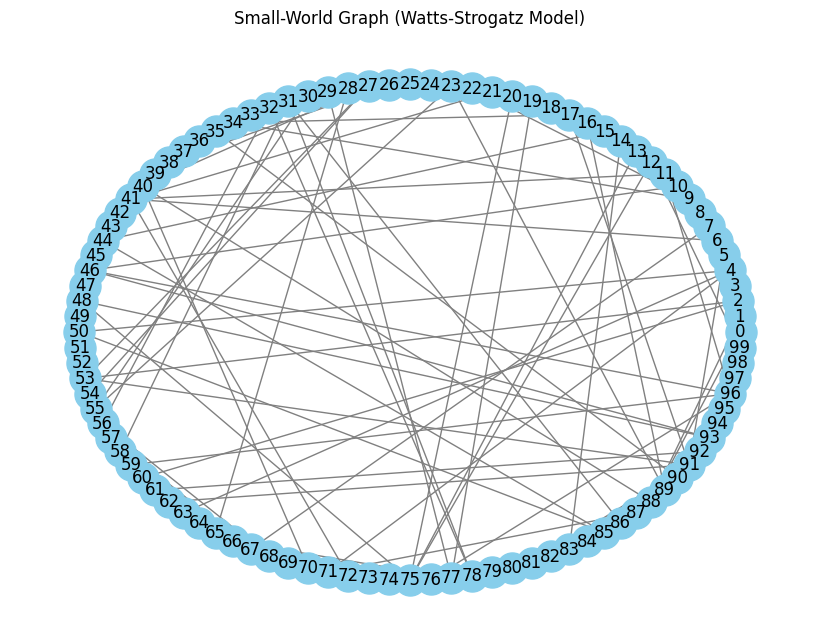

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters for the Watts-Strogatz small-world graph
n = 100      # Number of nodes
k = 4       # Each node is connected to k nearest neighbors in ring topology
p = 0.3     # Probability of rewiring each edge

# Generate the small-world graph
small_world_graph = nx.watts_strogatz_graph(n, k, p)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw_circular(small_world_graph, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Small-World Graph (Watts-Strogatz Model)")
plt.show()

In [17]:
# Step 2: Compute Degree Centrality
degree_centrality = nx.degree_centrality(small_world_graph)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Nodes by Degree Centrality:")
for node, centrality in sorted_degree:
    print(f"Node {node}: {centrality:.2f}")

# Step 3: Compute Closeness Centrality
closeness_centrality = nx.closeness_centrality(small_world_graph)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Nodes by Closeness Centrality:")
for node, centrality in sorted_closeness:
    print(f"Node {node}: {centrality:.2f}")

# Step 4: Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(small_world_graph)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Nodes by Betweenness Centrality:")
for node, centrality in sorted_betweenness:
    print(f"Node {node}: {centrality:.2f}")



Top 10 Nodes by Degree Centrality:
Node 96: 0.08
Node 75: 0.07
Node 91: 0.07
Node 41: 0.06
Node 44: 0.06
Node 53: 0.06
Node 56: 0.06
Node 88: 0.06
Node 2: 0.05
Node 4: 0.05

Top 10 Nodes by Closeness Centrality:
Node 91: 0.32
Node 53: 0.31
Node 5: 0.31
Node 41: 0.31
Node 78: 0.30
Node 89: 0.30
Node 4: 0.30
Node 71: 0.30
Node 75: 0.30
Node 96: 0.30

Top 10 Nodes by Betweenness Centrality:
Node 91: 0.14
Node 96: 0.09
Node 41: 0.08
Node 53: 0.08
Node 75: 0.08
Node 78: 0.06
Node 81: 0.05
Node 88: 0.05
Node 46: 0.05
Node 44: 0.05


In [21]:
# Convert and print the adjacency list
adjacency_list = nx_to_adjacency_list(small_world_graph)

# Compute PageRank for the graph
pagerank = compute_pagerank(adjacency_list)

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Nodes by PageRank:")
for node, centrality in sorted_pagerank:
    print(f"Node {node}: {centrality:.2f}")

Initial PageRank: {0: 0.01, 1: 0.01, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01, 8: 0.01, 9: 0.01, 10: 0.01, 11: 0.01, 12: 0.01, 13: 0.01, 14: 0.01, 15: 0.01, 16: 0.01, 17: 0.01, 18: 0.01, 19: 0.01, 20: 0.01, 21: 0.01, 22: 0.01, 23: 0.01, 24: 0.01, 25: 0.01, 26: 0.01, 27: 0.01, 28: 0.01, 29: 0.01, 30: 0.01, 31: 0.01, 32: 0.01, 33: 0.01, 34: 0.01, 35: 0.01, 36: 0.01, 37: 0.01, 38: 0.01, 39: 0.01, 40: 0.01, 41: 0.01, 42: 0.01, 43: 0.01, 44: 0.01, 45: 0.01, 46: 0.01, 47: 0.01, 48: 0.01, 49: 0.01, 50: 0.01, 51: 0.01, 52: 0.01, 53: 0.01, 54: 0.01, 55: 0.01, 56: 0.01, 57: 0.01, 58: 0.01, 59: 0.01, 60: 0.01, 61: 0.01, 62: 0.01, 63: 0.01, 64: 0.01, 65: 0.01, 66: 0.01, 67: 0.01, 68: 0.01, 69: 0.01, 70: 0.01, 71: 0.01, 72: 0.01, 73: 0.01, 74: 0.01, 75: 0.01, 76: 0.01, 77: 0.01, 78: 0.01, 79: 0.01, 80: 0.01, 81: 0.01, 82: 0.01, 83: 0.01, 84: 0.01, 85: 0.01, 86: 0.01, 87: 0.01, 88: 0.01, 89: 0.01, 90: 0.01, 91: 0.01, 92: 0.01, 93: 0.01, 94: 0.01, 95: 0.01, 96: 0.01, 97: 0.01, 98: 0.01, 9